In [3]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# PostgreSQL connection details
postgres_user = 'postgres'
postgres_password = ''
postgres_host = 'localhost'
postgres_port = '5432'
postgres_db = 'football'

# Create a PostgreSQL connection using SQLAlchemy
postgres_uri = f'postgresql://{postgres_user}:{postgres_password}@{postgres_host}:{postgres_port}/{postgres_db}'
engine = create_engine(postgres_uri)

# Define table name (adjust if necessary)
table_name = 'haaland_goals'

# Read the table into a Pandas DataFrame
df = pd.read_sql_table(table_name, engine)

# Check the first few rows of the dataframe to ensure it's loaded correctly
print(df.head())
print(df.info())

         Date   Opponent            Comp Venue Result  GF  GA  Goal_xG  \
0  2024-05-14  Tottenham  Premier League  Away      W   2   0     0.79   
1  2024-05-14  Tottenham  Premier League  Away      W   2   0     0.93   
2  2024-05-04     Wolves  Premier League  Home      W   5   1     0.09   
3  2024-05-04     Wolves  Premier League  Home      W   5   1     0.79   
4  2024-05-04     Wolves  Premier League  Home      W   5   1     0.08   

   Match_xG Minute  Body Part           Assist GoalContributionAction  \
0       2.4   90+1  Left Foot             None            Jeremy Doku   
1       2.4     51  Left Foot  Kevin De Bruyne        Kevin De Bruyne   
2       3.7     54  Left Foot       Phil Foden             Phil Foden   
3       3.7   45+3  Left Foot             None         Erling Haaland   
4       3.7     35       Head            Rodri                  Rodri   

    ActionType         Goalkeeper  match_id  
0       Fouled  Guglielmo Vicario        37  
1  Pass (Live)  Guglielm

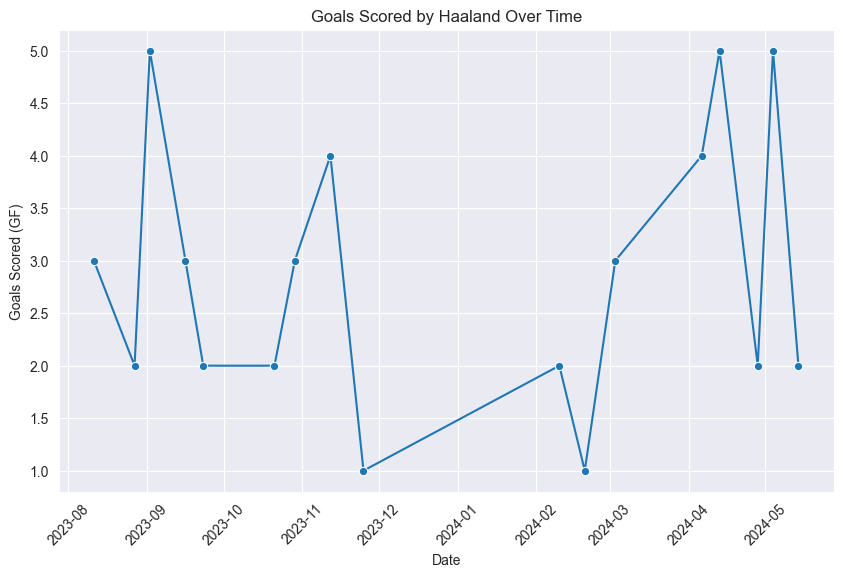

In [4]:
# 1. Goals Scored Over Time (Match Date vs. GF)
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='GF', marker='o')
plt.title('Goals Scored by Haaland Over Time')
plt.xlabel('Date')
plt.ylabel('Goals Scored (GF)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

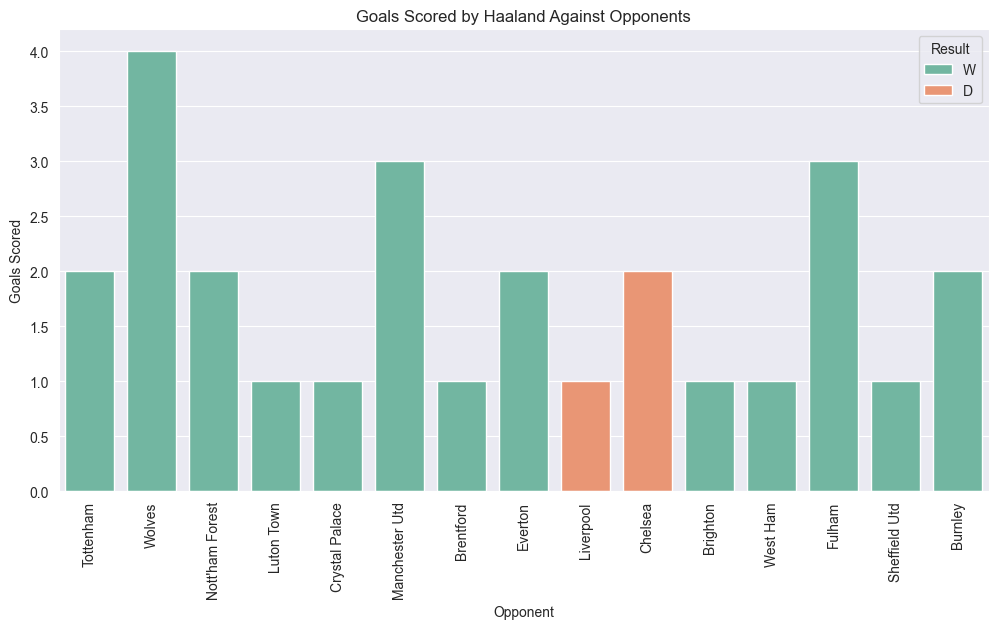

In [5]:
# 2. Goals Scored by Opponent
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Opponent', hue='Result', palette='Set2')
plt.title('Goals Scored by Haaland Against Opponents')
plt.xlabel('Opponent')
plt.ylabel('Goals Scored')
plt.xticks(rotation=90)
plt.legend(title='Result', loc='upper right')
plt.show()

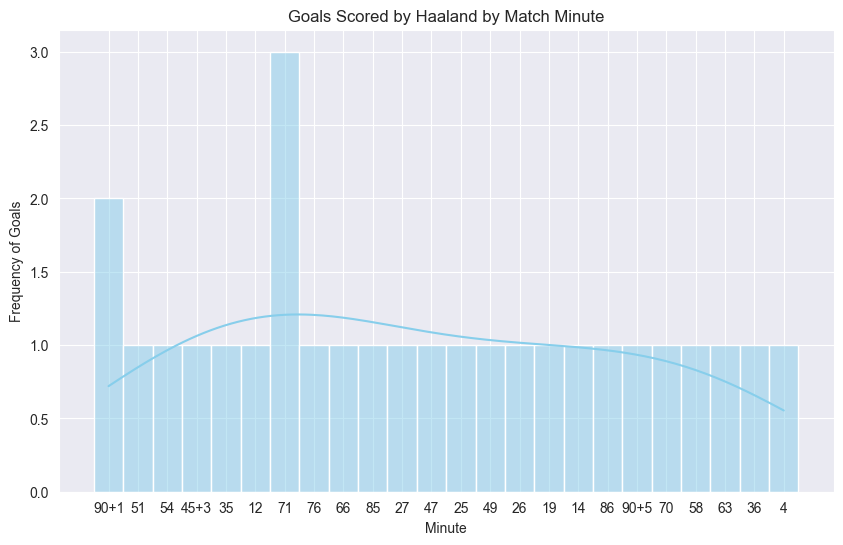

In [6]:
# 3. Goals Scored by Match Minute
plt.figure(figsize=(10, 6))
sns.histplot(df['Minute'], kde=True, bins=30, color='skyblue')
plt.title('Goals Scored by Haaland by Match Minute')
plt.xlabel('Minute')
plt.ylabel('Frequency of Goals')
plt.show()